# Project: Do Patients Show Up to Their Medical Appointments in Brazil?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This is dataset of 100k medical appointments from May 2016 in Brazil taken from Kaggle.  It is mainly focused on whether or not patients will show or no show for their appointment.  Here are the descriptions of the columns: Patient ID number, Appointment ID number, Gender of the patient, Date and time appointment was scheduled, Date and time of appointment, Age of the patient, Neighborhood of the patient, Patient is or is not involved with Brazilian Scholarship program, Hypertension present in patient, Diabetest present in patient, Alcoholism present in patient, Any handicap of the patient, SMS_received if they got a cell phone notification of their appointment, and the last column is if the patient no showed for their medical appointment.

Here are the four questions that this report will be focusing on from this dataset.
1) What age range misses their appointments the most?
2) On what day of the week are there the most no shows for appointments?
3) What Neighborhood has highest rate of patients that no show for appointments?  
4) What gender has a higher percentage of missing appointments?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('Brazil.may.2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The Patient ID number is really long in this data set!  But that is not an important column needed to answer the questions for this report.

In [3]:
df.shape

(110527, 14)

In [4]:
#   types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no rows with missing data as all have 110527 entries.

In [5]:
df.tail(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110517,5.574942e+12,5780122,F,2016-06-07T07:38:34Z,2016-06-07T00:00:00Z,19,MARIA ORTIZ,0,0,0,0,0,0,No
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110519,6.542388e+13,5630447,F,2016-04-27T15:23:14Z,2016-06-07T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [6]:
#check for duplicates
sum(df.duplicated())

0

No duplicated rows were found in the data set.

In [7]:
#.info above shows there are no missing values so let's check for the different data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

Scheduled Day and Appointment day are objects.  They will need to be changed to datetime for easier processing for analysis.



### Data Cleaning
This is where the data gets checked for any duplicates, missing values, name misspellings, or incorrect data type format.  If any of these are present, the data will be changed to make it easier for processing to answer the specific questions for this report.

In [8]:
#Rename Columns for better clarity and correct spellings
df.columns= ['Patient_ID', 'Appointment_ID', 'Gender', 'Scheduled_Day',  'Appt_Day',  'Age', 'Neighborhood', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_Show']
df.columns

Index(['Patient_ID', 'Appointment_ID', 'Gender', 'Scheduled_Day', 'Appt_Day',
       'Age', 'Neighborhood', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SMS_received', 'No_Show'],
      dtype='object')

In [9]:
#Top 5 rows of data
df.head(5)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appt_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Column names were successfully changed for the data set.

In [10]:
from datetime import datetime
#Convert Appt Day to datetime
def convert(data, format):
    return pd.to_datetime(data, format = format)
 
#format="%Y-%m-%dT%H:%M:%SZ
#df['Appt_Day'] = pd.to_datetime(df['Appt_Day'], format="%Y-%m-%dT%H:%M:%SZ")
df['Appt_Day'] = convert(df['Appt_Day'],"%Y-%m-%dT%H:%M:%SZ")
df.head(5)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appt_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [44]:
#Convert Scheduled Day to datetime
df['Scheduled_Day'] = convert(df['Scheduled_Day'], "%Y-%m-%dT%H:%M:%SZ")
df.head(5)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appt_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,Friday,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,Friday,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,Friday,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,Friday,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,Friday,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Patient_ID        110527 non-null float64
Appointment_ID    110527 non-null int64
Gender            110527 non-null object
Scheduled_Day     110527 non-null datetime64[ns]
Appt_Day          110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighborhood      110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_Show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


Both Appointment Day and Scheduled Day were successfully changed to date time format.

In [13]:
#Convert Appt_day to day of week
#reference used https://stackoverflow.com/questions/38065968/how-to-convert-a-column-of-type-series-to-datetime-weekdays-format-in-python
df['Appt_Day'] = df['Appt_Day'].dt.weekday_name
print (df.head(5))

     Patient_ID  Appointment_ID Gender       Scheduled_Day Appt_Day  Age  \
0  2.987250e+13         5642903      F 2016-04-29 18:38:08   Friday   62   
1  5.589978e+14         5642503      M 2016-04-29 16:08:27   Friday   56   
2  4.262962e+12         5642549      F 2016-04-29 16:19:04   Friday   62   
3  8.679512e+11         5642828      F 2016-04-29 17:29:31   Friday    8   
4  8.841186e+12         5642494      F 2016-04-29 16:07:23   Friday   56   

        Neighborhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   Handicap  SMS_received No_Show  
0         0             0      No  
1         0             0      N

Day of Week column will be used later for more analysis.

In [14]:
#Dataframe with no shows only
df_noshow=df[df['No_Show'] == "Yes"]

df_noshow.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appt_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,Friday,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,Friday,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,2016-04-26 08:44:12,Friday,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,2016-04-28 09:28:57,Friday,40,CONQUISTA,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27 07:51:14,Friday,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


In [15]:
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22319 entries, 6 to 110516
Data columns (total 14 columns):
Patient_ID        22319 non-null float64
Appointment_ID    22319 non-null int64
Gender            22319 non-null object
Scheduled_Day     22319 non-null datetime64[ns]
Appt_Day          22319 non-null object
Age               22319 non-null int64
Neighborhood      22319 non-null object
Scholarship       22319 non-null int64
Hypertension      22319 non-null int64
Diabetes          22319 non-null int64
Alcoholism        22319 non-null int64
Handicap          22319 non-null int64
SMS_received      22319 non-null int64
No_Show           22319 non-null object
dtypes: datetime64[ns](1), float64(1), int64(8), object(4)
memory usage: 2.6+ MB


Data has been narrowed down to those patients who did not show for their appointments.  Data is ready for analysis.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : What age range misses their appointments the most?

In [16]:
#Checking for unique values
df_noshow.nunique()

Patient_ID        17663
Appointment_ID    22319
Gender                2
Scheduled_Day     21180
Appt_Day              6
Age                 100
Neighborhood         80
Scholarship           2
Hypertension          2
Diabetes              2
Alcoholism            2
Handicap              5
SMS_received          2
No_Show               1
dtype: int64

In [17]:
#Find median age and top 25, 50, and 75% age that misses appointments
df_noshow.describe()

,Patient_ID,Appointment_ID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,2.231900e+04,2.231900e+04,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000
mean,1.467523e+14,5.652259e+06,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371
std,2.549905e+14,7.429686e+04,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198
min,5.628261e+06,5.122866e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.176779e+12,5.614192e+06,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.156794e+13,5.657916e+06,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.454270e+13,5.703175e+06,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.996585e+14,5.789986e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Median age is 34 and max age is 115.  Top 25% age is 16, top 50% is 33, top 75% is 51 and up.

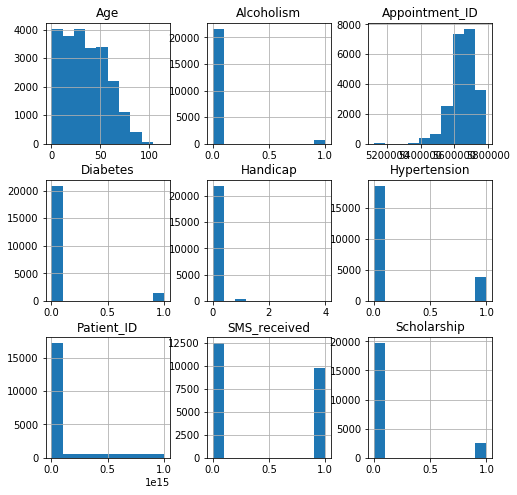

In [18]:
#Histogram of data to explore
df_noshow.hist(figsize=(8,8));

The age histogram is skewed to the right.  There is also a small number of patients in the data set that have Hypertension, Alcoholism, and Diabetes.

In [19]:
#Seperating into 4 age ranges from the table above: top 25%, top 50%, top 75%
df_under16=df_noshow[df_noshow['Age'] <=16]
df_under16.head(5)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appt_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
21,1.215484e+13,5628338,F,2016-04-27 10:50:45,Friday,4,CONQUISTA,0,0,0,0,0,0,Yes
22,8.632298e+14,5616091,M,2016-04-25 13:29:16,Friday,13,CONQUISTA,0,0,0,0,0,1,Yes
31,3.112849e+11,5628907,M,2016-04-27 12:07:14,Friday,12,NOVA PALESTINA,1,0,0,0,0,0,Yes
56,4.751189e+14,5600005,M,2016-04-19 09:47:43,Friday,12,NOVA PALESTINA,0,0,0,0,0,1,Yes
61,5.594636e+11,5626971,F,2016-04-27 08:53:09,Friday,2,NOVA PALESTINA,0,0,0,0,0,0,Yes


In [20]:
#Age 16 and under
df_under16total=df_under16['Appointment_ID'].count()
df_under16total

5601

In [21]:
#Age 17-33 range
df_noshow17_33=df[(df['Age'] >= 17) & (df['Age'] <= 33)]
df_noshow17_33.head(5)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appt_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,Friday,23,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,Friday,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,Friday,19,CONQUISTA,0,0,0,0,0,0,No
10,7.345362e+14,5630213,F,2016-04-27 14:58:11,Friday,30,NOVA PALESTINA,0,0,0,0,0,0,No
11,7.542951e+12,5620163,M,2016-04-26 08:44:12,Friday,29,NOVA PALESTINA,0,0,0,0,0,1,Yes


In [22]:
df_17_33total=df_noshow17_33['Appointment_ID'].count()
df_17_33total

24229

In [23]:
#Age 34-51 range
df_noshow34_51=df[(df['Age'] >= 34) & (df['Age'] <= 51)]
df_noshow34_51.head(5)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appt_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,Friday,39,GOIABEIRAS,0,0,0,0,0,0,Yes
16,8.457439e+13,5633121,M,2016-04-28 08:51:47,Friday,50,NOVA PALESTINA,0,0,0,0,0,0,No
17,1.479497e+13,5633460,F,2016-04-28 09:28:57,Friday,40,CONQUISTA,1,0,0,0,0,0,Yes
19,7.223289e+12,5640433,F,2016-04-29 10:43:14,Friday,46,DA PENHA,0,0,0,0,0,0,No
23,2.137540e+14,5634142,F,2016-04-28 10:27:05,Friday,46,CONQUISTA,0,0,0,0,0,0,No


In [24]:
df_34_51total=df_noshow34_51['Appointment_ID'].count()
df_34_51total

26571

In [25]:
#Age over 52
df_over52=df_noshow[df_noshow['Age'] >=52]
df_over52.head(5)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appt_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
44,2.741649e+11,5635414,F,2016-04-28 13:27:27,Friday,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes
48,8.545415e+12,5618643,F,2016-04-26 07:19:49,Friday,58,SÃO CRISTÓVÃO,0,0,0,0,0,1,Yes
79,9.912882e+13,5597673,M,2016-04-18 17:53:25,Friday,67,MARIA ORTIZ,0,0,0,0,0,1,Yes
126,9.447582e+14,5633576,F,2016-04-28 09:37:22,Friday,67,PRAIA DO SUÁ,0,0,1,0,0,0,Yes
212,4.266984e+14,5642059,M,2016-04-29 14:59:38,Friday,62,SANTOS DUMONT,0,1,1,0,0,0,Yes


In [26]:
df_over52_total=df_over52['Appointment_ID'].count()
df_over52_total

5444

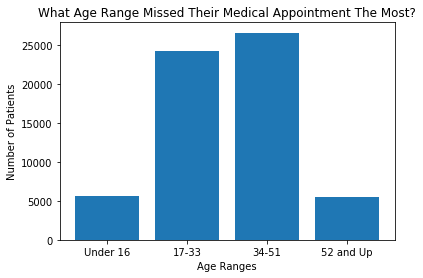

In [27]:
#Plot bar chart of all 4 different age ranges
plt.bar(["Under 16", "17-33", "34-51", "52 and Up"], [df_under16total, df_17_33total, df_34_51total, df_over52_total])
plt.title("What Age Range Missed Their Medical Appointment The Most?")
plt.xlabel("Age Ranges")
plt.ylabel("Number of Patients");

Ages 34-51 miss the most appointments while ages 17-33 miss the 2nd most number of appointments.

### Research Question 2 : On what day do patients miss their appointments the most?

In [28]:
df_noshow['Appt_Day'].describe()

count       22319
unique          6
top       Tuesday
freq         5152
Name: Appt_Day, dtype: object

Tuesday is the day when patients miss their appointments the most.

In [29]:
df_day=df_noshow['Appt_Day'].value_counts()
df_day

Tuesday      5152
Wednesday    5093
Monday       4690
Friday       4037
Thursday     3338
Saturday        9
Name: Appt_Day, dtype: int64

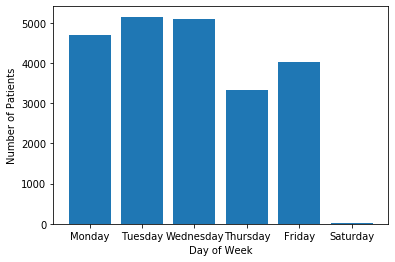

In [30]:
#plot graph with above data
days=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
values=[4690, 5152, 5093, 3338, 4037, 9]
plt.bar(days, values)
plt.xlabel('Day of Week')
plt.ylabel('Number of Patients');

The most missed day of the week is Tuesday followed by Wednesday and Monday.  Patients make their appointments the most on Saturdays.

### Research Question 3 : In what neighborhood do patients miss their appointments the most?

In [31]:
df_Location=df['Neighborhood'].value_counts()
df_Location.head(5)

JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4431
JARDIM DA PENHA    3877
ITARARÉ            3514
Name: Neighborhood, dtype: int64

In [32]:
df_loc_20=df_Location.head(20)
df_loc_20

JARDIM CAMBURI       7717
MARIA ORTIZ          5805
RESISTÊNCIA          4431
JARDIM DA PENHA      3877
ITARARÉ              3514
CENTRO               3334
TABUAZEIRO           3132
SANTA MARTHA         3131
JESUS DE NAZARETH    2853
BONFIM               2773
SANTO ANTÔNIO        2746
SANTO ANDRÉ          2571
CARATOÍRA            2565
JABOUR               2509
SÃO PEDRO            2448
ILHA DO PRÍNCIPE     2266
NOVA PALESTINA       2264
ANDORINHAS           2262
DA PENHA             2217
ROMÃO                2215
Name: Neighborhood, dtype: int64

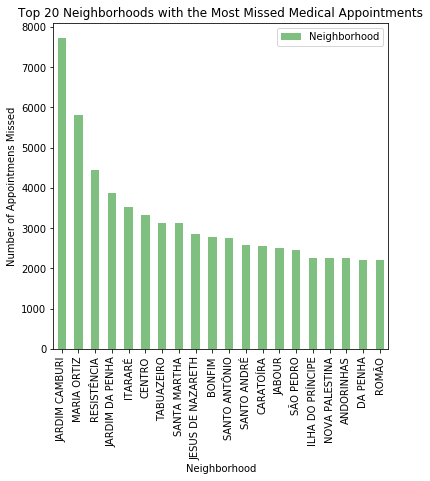

In [33]:
#Top 20 Locations with the most missed appointments
#bar chart of data above
#** Why are x and y label not showing?**
df_loc_20.plot(kind='bar', alpha=0.5, color='green', figsize=(6,6))
plt.title('Top 20 Neighborhoods with the Most Missed Medical Appointments')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Appointmens Missed')
plt.legend();

The neighborhood with the most missed appointments is Jardim Camburi followed by Maria Ortiz and Resistencia.  The other neighborhoods are very close for the same number of missed appointments.

### Research Question 4 : What gender has a higher percentage of missing appointments in the Jardim Camburi Neighborhood?

In [34]:
df_gen_f=df_noshow[df_noshow['Gender'] == "F"]               
df_gen_f.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appt_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,Friday,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,Friday,39,GOIABEIRAS,0,0,0,0,0,0,Yes
17,1.479497e+13,5633460,F,2016-04-28 09:28:57,Friday,40,CONQUISTA,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27 07:51:14,Friday,30,NOVA PALESTINA,0,0,0,0,0,0,Yes
21,1.215484e+13,5628338,F,2016-04-27 10:50:45,Friday,4,CONQUISTA,0,0,0,0,0,0,Yes


Successful at narrowing data set to only females.

In [35]:
df_f_jardim=df_gen_f[df_gen_f['Neighborhood'] == "JARDIM CAMBURI"]
df_f_jardim.head(5)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appt_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
446,2.449424e+10,5562707,F,2016-04-08 14:13:23,Friday,60,JARDIM CAMBURI,0,0,0,0,0,1,Yes
3141,6.432929e+13,5630294,F,2016-04-27 15:06:50,Friday,20,JARDIM CAMBURI,0,0,0,0,0,0,Yes
4356,2.146356e+12,5734655,F,2016-05-24 15:59:06,Monday,7,JARDIM CAMBURI,0,0,0,0,0,1,Yes
4372,6.556526e+10,5728836,F,2016-05-20 18:44:03,Tuesday,40,JARDIM CAMBURI,0,0,0,0,0,1,Yes
4487,6.556526e+10,5677135,F,2016-05-09 18:16:22,Friday,40,JARDIM CAMBURI,0,0,0,0,0,0,Yes


In [36]:
df_f_jardim.shape

(997, 14)

In [37]:
df_gen_m=df_noshow[df_noshow['Gender'] == "M"]               
df_gen_m.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appt_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
11,7.542951e+12,5620163,M,2016-04-26 08:44:12,Friday,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
22,8.632298e+14,5616091,M,2016-04-25 13:29:16,Friday,13,CONQUISTA,0,0,0,0,0,1,Yes
31,3.112849e+11,5628907,M,2016-04-27 12:07:14,Friday,12,NOVA PALESTINA,1,0,0,0,0,0,Yes
56,4.751189e+14,5600005,M,2016-04-19 09:47:43,Friday,12,NOVA PALESTINA,0,0,0,0,0,1,Yes
76,6.549277e+12,5597643,M,2016-04-18 17:40:18,Friday,28,ANTÔNIO HONÓRIO,0,0,0,0,0,0,Yes


Successful at narrowing data set to only males.

In [38]:
df_m_jardim=df_gen_m[df_gen_m['Neighborhood'] == "JARDIM CAMBURI"]
df_m_jardim.head(5)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appt_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
448,6.281844e+13,5564809,M,2016-04-11 08:06:06,Friday,12,JARDIM CAMBURI,0,0,0,0,0,1,Yes
575,2.997788e+14,5609550,M,2016-04-20 16:09:23,Friday,23,JARDIM CAMBURI,0,0,0,0,0,1,Yes
610,3.385224e+12,5634237,M,2016-04-28 10:37:09,Friday,48,JARDIM CAMBURI,0,0,0,0,0,0,Yes
1960,9.758229e+14,5628416,M,2016-04-27 10:59:08,Friday,17,JARDIM CAMBURI,0,0,0,0,0,0,Yes
2325,7.317142e+12,5625221,M,2016-04-27 07:03:50,Friday,0,JARDIM CAMBURI,0,0,0,0,0,0,Yes


In [39]:
df_m_jardim.shape

(468, 14)

In [40]:
df_jardimtotal=df_noshow[df_noshow['Neighborhood'] == "JARDIM CAMBURI"]
df_jardimtotal.shape

(1465, 14)

In [41]:
#Find out %female from total
df_perF=997/1465
df_perF

0.6805460750853243

In [42]:
#Find out %male from total
df_perM=468/1465
df_perM

0.3194539249146758

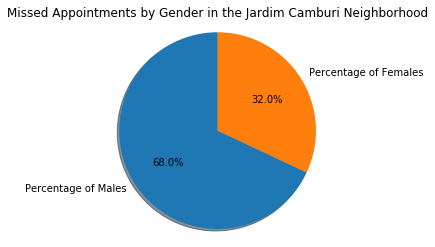

In [43]:
#Make pie chart
#Used https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py for reference
labels = 'Percentage of Males', 'Percentage of Females'
sizes = [68, 32]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Missed Appointments by Gender in the Jardim Camburi Neighborhood')
plt.show();

Males miss their appointments more than females in the Jardim Camburi Neighborhood.

<a id='conclusions'></a>
## Conclusions

    Research Question 1 : What age range misses their appointments the most?
Of those patients that do not show for their appointments, the highest number of appointments missed is 26571 with the age range of 34 to 51.  Patients in this range have other obligations that could cause them to miss their appointments.  Also, I didn't investigate furthur but possibly this range already has been diagnosed with alcoholism, hypertension, or diabetes.  The second highest age range is 17-33 with 24229 appointments missed.  During this age range many are attending school, starting a family, or starting their first career.  It could be possible that they made an appointment but could not get out of other obligations. 

    Research Question 2 : On what day do patients miss their appointments the most?
The day patients miss their appointments the most is Tueday with 5152 appointments followed by Wednesday with 5093 appointments missed.  These days fall in the middle of the week and patients maybe at work, traveling, or just started a new project that week.  I was surprised that Monday did not have the highest day as many some people like to call in sick on that day.  Also note that Saturday only had 9 missed appointments as this is the easiest day to get off work or may not be scheduled to work at all.  

Tuesday      5152
Wednesday    5093
Monday       4690
Friday       4037
Thursday     3338
Saturday        9

    Research Question 3 : In what neighborhood do patients miss their appointments the most?
The top 5 neighborhood locations where patients miss their appointments the most are below.
JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4431
JARDIM DA PENHA    3877
ITARARÉ            3514
I would have liked to dig deeper to see if these neighborhoods had patients on Scholarship from the Brazilian welfare program.  If patients were on scholarship, they may or may not have as much of an incentive to go to their appointment.  I'd also like to research more demographic information from these areas.  Could poverty, unemployment rate, population, and climate play a factor into this?  There is more information out there that could help determind why Jardim Camburi and Maria Ortiz are the top two locations.

    Research Question 4 : What gender has a higher percentage of missing appointments in the Jardim Camburi Neighborhood?
In Jardim Camburi of those who did not make their appointments, 32% are Females and 68% are Males.  Are males the career leaders for their family?  Do females value their health more than males in this area?   

## Limitations
1) The dataset doesn't tell where all the neighborhoods are located in relation to eachother.  I would be very curious to see a map where all of these are located and if the three neighborhoods with the most missed appointments are close to eachother.
2) Characteristics like Alocholism, Hypertension, and Diabestes don't tell me enough information.  How long has the patient had these and if they have had them for longed does that cause them to miss more appointments?
3)  The SMS_notifications received row can be misleading.  I am not sure if the patient received the message or a family member.  Also,  when was the notification sent?  It could be possible that different locations send the notifications at different times.
4) The hours of the medical locations is unknown.  Saturday appointments could be the least missed because they have limited hours on Saturdays or another day during the week.  I did not further study the appointment times from this data set.
        